# Predict Sales for Social Media Advertisment

![social_media](images/social-media.jpg)

### Agenda:
* How do we load the advertisement dataset into the notebook?
* How does the advertisement dataset looks like?
* How do we describe a dataset using machine learning terminology?
* How do we visualize data using seaborn?
* What is the linear regression model?
* How do we split, train and evaluate a model?
* What is feature selection?
* What is cross-validation?

## Introduction to the dataset
### Start with reading the file

In [1]:
# Conventional way to import pandas
import pandas as pd

In [2]:
# read CSV file using a relative path
data = pd.read_csv(filepath_or_buffer="data/advertising.csv", index_col=0)

* __filepath_or_buffer__: The relative path to the file containing the data
* __index_col__: The column to use as index in the DataFrame

In [3]:
# display the first 5 rows
data.head()

,Facebook,Instagram,Twitter,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Main object types:

* __DataFrame__: rows and columns
* __Series__: single column

In [4]:
# display the last 5 rows
data.tail()

,Facebook,Instagram,Twitter,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

## Understand the data
The dataset consist of the cost of advertisement on three social media platforms and the sales of a single product in a given market.

### Machine learning terminology

* Each row is an __observation__ (also known as: sample, example, instance, record)
* Each column is a __feature__ (also known as: predictor, attribute, independent variable, input, regressor, covariate)
* Each value we are predicting is the __response__ (also known as: target, outcome, label, dependent variable)

#### What are the features?

In [6]:
# print the name of the three features
data.columns[:3]

Index(['Facebook', 'Instagram', 'Twitter'], dtype='object')

In [7]:
# print the first five rows of the features
data[["Facebook", "Instagram", "Twitter"]].head()

,Facebook,Instagram,Twitter
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


* __Facebook:__ advertising dollars spent on Facebook for a single product in a given market (in thousands of dollars)
* __Instagram:__ advertising dollars spent on Instagram
* __Twitter:__ advertising dollars spent on Twitter

#### What is the response?

In [8]:
# print the name of the response
data.columns[3]

'Sales'

In [9]:
# print the first five rows of the response
data["Sales"].head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

* __Sales:__ sales of a single product in a given market (in thousands of items)

### What is the difference between the response of the iris and the sales advertisment dataset?

The response of the iris dataset is categorical, while the response of the sales advertisment dataset is continous, which means this is a regression problem.

* __Classification__ is supervised learning in which the response is categorical
* __Regression__ is supervised learning in which the response is continuous

## Visualizing data using seaborn
__Seaborn:__ Python library for statistical data visualization built on top of Matplotlib

* Anaconda users: run conda __install seaborn__ from the command line

In [10]:
# Conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


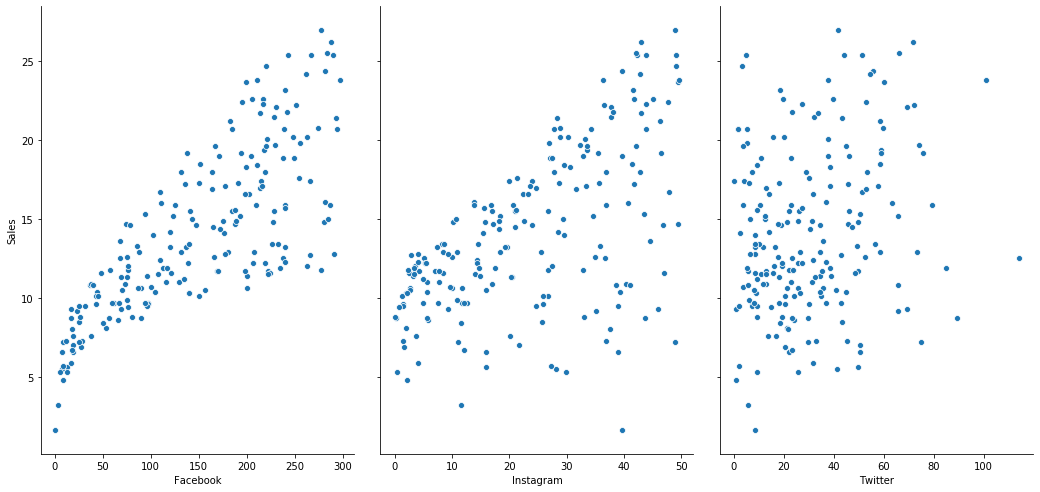

In [11]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Facebook','Instagram','Twitter'], y_vars='Sales', size=7, aspect=0.7)

## Motivation

Why are we using linear regression?

* widely used
* runs fast
* easy to use (not a lot of tuning required)
* highly interpretable
* basis for many other methods

Note: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)



## Simple Linear Regression

Simple linear regression is an approach for predicting a __quantitative response__ using a __single feature__ (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?

* $y$ is the response
* $x$ is the feature
* $\beta_0$ is the intercept
* $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

### Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the least squares criterion, which means we are finding the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

![least_squares](images/estimating_coefficients.png)

What elements are present in the diagram?

* The black dots are the observed values of x and y.
* The blue line is our least squares line.
* The red lines are the residuals, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?

* $\beta_0$ is the __intercept__ (the value of $y$ when $x$=0)
* $\beta_1$ is the __slope__ (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

![slope_intercept](images/slope_intercept.png)

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times Facebook + \beta_2 \times Instagram + \beta_3 \times Twitter$

## Prepare the input data (feature matrix "X" and response vector "y")

In [12]:
# create a Python list of feature names
feature_cols = ['Facebook', 'Instagram', 'Twitter']

In [13]:
# use the list to select a subset of the original DataFrame
X = data[feature_cols]

In [14]:
# print the first 5 rows
X.head()

,Facebook,Instagram,Twitter
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


#### Which datatype and size do we expect X to have?

In [15]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [16]:
# select the response vector from the DataFrame
y = data['Sales']

In [17]:
# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

#### Which datatype and size do we expect y to have?

In [18]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Follow the following procedure

1. Split the dataset into two pieces: a __training set__ and a __testing set__.
2. Train the model on the __training set__.
3. Test the model on the __testing set__, and evaluate how well we did.

### Why do we want to split the data into a training_set and a testing_set?

* The goal is to estimate the model performance on out-of-sample (unseen) data
* Training and testing on the same data will result in overly complex models that will overfit the data. 

![Overfitting](images/05_overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

### Step 1: Split the dataset into two pieces: a __training_set__ and a __testing_set__

* The goal is to avoid overfitting and estimate how well a model performs on unseen data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

* __test_size__: the proportion of the dataset to include in the test set
* __random_state__: controls the shuffling applied to the data before applying the split

![Train/test split](images/05_train_test_split.png)

What did this accomplish?

* Model can be trained and tested on __different data__
* Response values are known for the testing set, and thus __predictions can be evaluated__
* __Testing accuracy__ is a better estimate than training accuracy of out-of-sample performance

In [20]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(160, 3)
(40, 3)


In [21]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(160,)
(40,)


### Step 2: Train the model with linear regression on the training set

__Step 1:__ Import the class (model) you want to use

In [22]:
from sklearn.linear_model import LinearRegression

__Step 2:__ "Instantiate" the "estimator"

* "Estimator" is scikit-learn's term for model
* "Instantiate" means "make an instance of"

In [23]:
linreg = LinearRegression()

* Name of the object does not matter
* Linear regression does not require parameter tuning (compared to KNN)
* All parameters not specified are set to their defaults

In [24]:
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


__Step 3:__ Fit the model with the training data (aka "model training")

* Model is learning the coefficients
* Occurs in-place

In [25]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Intepreteing the model coefficients

In [26]:
# Print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.9079470208164295
[0.0468431  0.17854434 0.00258619]


In [27]:
# Pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('Facebook', 0.04684310317699042),
 ('Instagram', 0.17854434380887615),
 ('Twitter', 0.0025861860939889944)]

$$y = 2.91 + 0.0468 \times Facebook + 0.179 \times Instagram + 0.00259 \times Twitter$$

How do we interpret the __Facebook coefficient__ (0.0468)?

* For a given amount of Instagram and Twitter ad spending, __a "unit" increase in Facebook ad spending__ is associated with a __0.0468 "unit" increase in Sales__.
* Or more clearly: For a given amount of Instagram and Twitter ad spending, __an additional $1,000 spent on Facebook ads__ is associated with an __increase in sales of 46.8 items__.

Important notes:

* This is a statement of __association__, not __causation.__
* If an increase in Facebook ad spending was associated with a __decrease__ in sales, $\beta_1$ would be __negative__.

__Step 4:__ Predict the response (sales) on the testing set

In [28]:
y_pred = linreg.predict(X_test)

## Step 3: Test the model on the testing set, and evaluate how well we did.

We need an __evaluation metric__ in order to compare our predictions with the actual values!

### Model evaluation metrics for regression

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

In [29]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [30]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


__Mean Squared Error__ (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [31]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [32]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

* __MAE__ is the easiest to understand, because it's the average error.
* __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
* __RMSE__ is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Compute the RMSE for our sales predictions

In [33]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4113417558581582


## Feature selection

Does __Twitter__ "belong" in our model? In other words, does it improve the quality of our predictions?

Let's __remove__ it from the model and check the RMSE!

In [34]:
# create a Python list of feature names
feature_cols = ['Facebook', 'Instagram']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a response from the DataFrame
y = data['Sales']

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE __decreased__ when we removed Twitter from the model. (Error is something we want to minimize, so __a lower number for RMSE is better.__) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## Cross-validation

There is a drawback of using the train/test split procedure for model evaluation. The drawback is that we are not using the entire dataset and depending on the observations that are selected for the testing set, the testing accuracy can significantly change.

### Steps for K-fold cross-validation
1. Split the dataset into K __equal__ partitions (or "folds").
2. Use fold 1 as the __testing set__ and the union of the other folds as the __training set__.
3. Calculate __testing accuracy__.
4. Repeat steps 2 and 3 K times, using a __different fold__ as the testing set each time.
5. Use the __average testing accuracy__ as the estimate of out-of-sample accuracy.

Diagram of __5-fold cross-validation__:

![Cross-validation](images/07_cross_validation_diagram.png)

In [35]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, dataset in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, dataset[0], str(dataset[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


* Dataset contains __25 observations__ (numbered 0 through 24)
* 5-fold cross-validation, thus it runs for __5 iterations__
* For each iteration, every observation is either in the training set or the testing set, __but not both__
* Every observation is in the testing set __exactly once__

### Comparing cross-validation to train/test split

Advantages of __cross-validation__:

* More accurate estimate of out-of-sample accuracy
* More "efficient" use of data (every observation is used for both training and testing)

Advantages of __train/test split__:

* Runs K times faster than K-fold cross-validation
* Simpler to examine the detailed results of the testing process

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# 10-fold cross-validation with all three features
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]


In [38]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.38264572 3.28736055 2.09185507 2.81784389 1.27311083 1.74391853
 8.0006111  2.07650936 3.03635301 2.4289835 ]


In [39]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.83919703 1.81310798 1.44632468 1.67864347 1.12832213 1.32057507
 2.82853515 1.44100984 1.74251342 1.55851965]


In [40]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6796748419090766


In [41]:
# 10-fold cross-validation with two features (excluding Twitter)
feature_cols = ['Facebook', 'Instagram']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766
